In [ ]:
"""
### **spacy_text_classification : Solutions**


- In this exercise, you are going to classify whether a given text belongs to one of possible classes ['BUSINESS', 'SPORTS', 'CRIME'].

- you are going to use spacy for pre-processing the text, convert text to numbers and apply different classification algorithms.
"""

In [1]:
#import spacy and load the language model downloaded

import spacy
nlp = spacy.load("en_core_web_lg")

2023-06-08 19:57:22.480681: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
"""
### **About Data: News Category Classifier**

Credits: https://www.kaggle.com/code/hengzheng/news-category-classifier-val-acc-0-65


- This data consists of two columns.
        - Text
        - Category
- Text are the description about a particular topic.
- Category determine which class the text belongs to.
- we have classes mainly of 'BUSINESS', 'SPORTS', 'CRIME' and comes under Multi-class classification Problem.
"""

In [3]:
#import pandas library
import pandas as pd


#read the dataset "news_dataset.json" provided and load it into dataframe "df"
df = pd.read_json('news_dataset.json')

#print the shape of data
print(df.shape)

#print the top5 rows
df.head()

(12695, 2)


,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [4]:
#check the distribution of labels 
df['category'].value_counts()

BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: category, dtype: int64

In [14]:
#Add the new column which gives a unique number to each of these labels 
df['label_num'] = df['category'].map({'CRIME': 0, 'SPORTS': 1, 'BUSINESS': 2, 'SCIENCE': 4})


#check the results with top 5 rows
df.head(5) 

,text,category,label_num,preprocessed_text,vector
0,Watching Schrödinger's Cat Die University of C...,SCIENCE,4,watch Schrödinger Cat Die University Californi...,"[-0.85190785, 1.0438694, -0.9148885, -1.395817..."
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE,4,watch freaky Vortex open Flooded Lake,"[0.60747343, 1.9251899, -0.16949336, -0.573053..."
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS,2,entrepreneur today need Big Budget start year ...,"[0.088981755, 0.5882564, -1.2281352, -0.320762..."
3,These Roads Could Recharge Your Electric Car A...,BUSINESS,2,road recharge Electric Car drive high tech hig...,"[-1.0280653, 4.349204, -1.06896, -1.045683, 1...."
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME,0,civilian Guard Fires Gun protect Recruiting Ce...,"[-1.4220493, 0.9367255, -1.8070079, 3.1870718,..."


In [15]:
# Preprocessing the data

#use this utility function to preprocess the text
#1. Remove the stop words
#2. Convert to base form using lemmatisation


def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return ' '.join(filtered_tokens)

In [16]:
#create a new column "preprocessed_text" which store the clean form of given text [use apply and lambda function]

df['preprocessed_text'] = df['text'].apply(lambda text: preprocess(text))

In [17]:
#print the top 5 rows

df.head()

,text,category,label_num,preprocessed_text,vector
0,Watching Schrödinger's Cat Die University of C...,SCIENCE,4,watch Schrödinger Cat Die University Californi...,"[-0.85190785, 1.0438694, -0.9148885, -1.395817..."
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE,4,watch freaky Vortex open Flooded Lake,"[0.60747343, 1.9251899, -0.16949336, -0.573053..."
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS,2,entrepreneur today need Big Budget start year ...,"[0.088981755, 0.5882564, -1.2281352, -0.320762..."
3,These Roads Could Recharge Your Electric Car A...,BUSINESS,2,road recharge Electric Car drive high tech hig...,"[-1.0280653, 4.349204, -1.06896, -1.045683, 1...."
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME,0,civilian Guard Fires Gun protect Recruiting Ce...,"[-1.4220493, 0.9367255, -1.8070079, 3.1870718,..."


In [18]:
### **Get the spacy embeddings for each preprocessed text**

In [19]:
#create a new column "vector" that store the vector representation of each pre-processed text

df['vector'] = df['preprocessed_text'].apply(lambda text: nlp(text).vector) 

In [20]:
#print the top 5 rows

df.head()

,text,category,label_num,preprocessed_text,vector
0,Watching Schrödinger's Cat Die University of C...,SCIENCE,4,watch Schrödinger Cat Die University Californi...,"[-0.85190785, 1.0438694, -0.9148885, -1.395817..."
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE,4,watch freaky Vortex open Flooded Lake,"[0.60747343, 1.9251899, -0.16949336, -0.573053..."
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS,2,entrepreneur today need Big Budget start year ...,"[0.088981755, 0.5882564, -1.2281352, -0.320762..."
3,These Roads Could Recharge Your Electric Car A...,BUSINESS,2,road recharge Electric Car drive high tech hig...,"[-1.0280653, 4.349204, -1.06896, -1.045683, 1...."
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME,0,civilian Guard Fires Gun protect Recruiting Ce...,"[-1.4220493, 0.9367255, -1.8070079, 3.1870718,..."


In [21]:
from sklearn.model_selection import train_test_split


#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values, 
    df.label_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

In [22]:
import numpy as np

print("Shape of X_train before reshaping: ", X_train.shape)
print("Shape of X_test before reshaping: ", X_test.shape)


X_train_2d = np.stack(X_train)
X_test_2d =  np.stack(X_test)

print("Shape of X_train after reshaping: ", X_train_2d.shape)
print("Shape of X_test after reshaping: ", X_test_2d.shape)

Shape of X_train before reshaping:  (10156,)
Shape of X_test before reshaping:  (2539,)
Shape of X_train after reshaping:  (10156, 300)
Shape of X_test after reshaping:  (2539, 300)


In [ ]:
"""
**Attempt 1:**


- use spacy glove embeddings for text vectorization.

- use Decision Tree as the classifier.

- print the classification report.
"""

In [24]:
from sklearn.metrics import classification_report

In [25]:
from sklearn.tree import DecisionTreeClassifier


#1. creating a Decision Tree model object
clf = DecisionTreeClassifier()

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63       579
           1       0.71      0.69      0.70       833
           2       0.68      0.69      0.68       851
           4       0.43      0.45      0.44       276

    accuracy                           0.65      2539
   macro avg       0.61      0.62      0.61      2539
weighted avg       0.65      0.65      0.65      2539



In [ ]:
"""
**Attempt 2:**


- use spacy glove embeddings for text vectorization.
- use MultinomialNB as the classifier after applying the MinMaxscaler.
- print the classification report.
"""

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report


#doing scaling because Negative values will not pass into Naive Bayes models
scaler = MinMaxScaler()                                         
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)

#1. creating a MultinomialNB model object 
clf = MultinomialNB()

#2. fit with all_train_embeddings and y_train
clf.fit(scaled_train_embed , y_train) 


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(scaled_test_embed)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.54      0.69       579
           1       0.65      0.86      0.74       833
           2       0.65      0.84      0.73       851
           4       1.00      0.00      0.01       276

    accuracy                           0.69      2539
   macro avg       0.81      0.56      0.54      2539
weighted avg       0.75      0.69      0.64      2539



In [ ]:
"""
**Attempt 3:**


- use spacy glove embeddings for text vectorization.
- use KNeighborsClassifier as the classifier after applying the MinMaxscaler.
- print the classification report.
"""

In [27]:
from  sklearn.neighbors import KNeighborsClassifier


#1. creating a KNN model object
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       579
           1       0.84      0.86      0.85       833
           2       0.83      0.85      0.84       851
           4       0.87      0.50      0.64       276

    accuracy                           0.82      2539
   macro avg       0.83      0.77      0.79      2539
weighted avg       0.82      0.82      0.82      2539



In [ ]:
"""
**Attempt 4:**


- use spacy glove embeddings for text vectorization.
- use RandomForestClassifier as the classifier after applying the MinMaxscaler.
- print the classification report.
"""

In [28]:
from sklearn.ensemble import RandomForestClassifier


#1. creating a Random Forest model object
clf = RandomForestClassifier()


#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       579
           1       0.83      0.88      0.85       833
           2       0.79      0.88      0.83       851
           4       0.90      0.46      0.61       276

    accuracy                           0.82      2539
   macro avg       0.84      0.76      0.78      2539
weighted avg       0.83      0.82      0.82      2539



In [ ]:
"""
**Attempt 5:**


- use spacy glove embeddings for text vectorization.
- use GradientBoostingClassifier as the classifier after applying the MinMaxscaler.
- print the classification report.
"""

In [29]:
from sklearn.ensemble import GradientBoostingClassifier


#1. creating a GradientBoosting model object
clf = GradientBoostingClassifier()

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       579
           1       0.87      0.88      0.88       833
           2       0.85      0.86      0.86       851
           4       0.77      0.69      0.73       276

    accuracy                           0.85      2539
   macro avg       0.84      0.82      0.83      2539
weighted avg       0.85      0.85      0.85      2539



Text(95.72222222222221, 0.5, 'Truth')

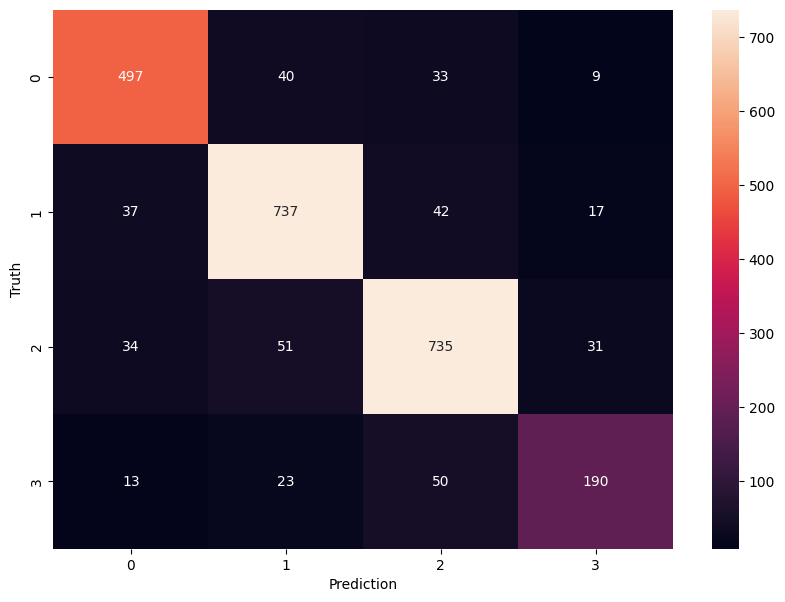

In [30]:
# Confusion matrix with the best model outcome

#finally print the confusion matrix for the best model: GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')